In [69]:
'''About this dataset
Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

age - age in years
sex - sex (1 = male; 0 = female)
cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic)
trestbps - resting blood pressure (in mm Hg on admission to the hospital)
chol - serum cholestoral in mg/dl
fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
restecg - resting electrocardiographic results (0 = normal; 1 = having ST-T; 2 = hypertrophy)
thalach - maximum heart rate achieved
exang - exercise induced angina (1 = yes; 0 = no)
oldpeak - ST depression induced by exercise relative to rest
slope - the slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping)
ca - number of major vessels (0-3) colored by flourosopy
thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
num - the predicted attribute - diagnosis of heart disease (angiographic disease status) 
(Value 0 = < 50% diameter narrowing; Value 1 = > 50% diameter narrowing)

'''

"About this dataset\nAge : Age of the patient\n\nSex : Sex of the patient\n\nexang: exercise induced angina (1 = yes; 0 = no)\n\nca: number of major vessels (0-3)\n\ncp : Chest Pain type chest pain type\n\nValue 1: typical angina\nValue 2: atypical angina\nValue 3: non-anginal pain\nValue 4: asymptomatic\ntrtbps : resting blood pressure (in mm Hg)\n\nchol : cholestoral in mg/dl fetched via BMI sensor\n\nfbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)\n\nrest_ecg : resting electrocardiographic results\n\nValue 0: normal\nValue 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)\nValue 2: showing probable or definite left ventricular hypertrophy by Estes' criteria\nthalach : maximum heart rate achieved\n\ntarget : 0= less chance of heart attack 1= more chance of heart attack\n\nage - age in years\nsex - sex (1 = male; 0 = female)\ncp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptoma

In [70]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
#solvers default:'ibfgs','newton-cg','liblinear','sag','saga'
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
plt.style.use('ggplot')

# read the data
df = pd.read_csv('heart.xls')
small_df = df[['age', 'sex', 'output']]
arr = df[['age', 'sex', 'cp', 'output']].values
#look at the data
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [71]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [72]:
#let's see if there's missing data 
for col in df.columns:
    missing= np.mean(df[col].isnull())
    print('{}  -  {}%'.format(col,missing))

age  -  0.0%
sex  -  0.0%
cp  -  0.0%
trtbps  -  0.0%
chol  -  0.0%
fbs  -  0.0%
restecg  -  0.0%
thalachh  -  0.0%
exng  -  0.0%
oldpeak  -  0.0%
slp  -  0.0%
caa  -  0.0%
thall  -  0.0%
output  -  0.0%


In [73]:
df.sort_values(by=['age'], ascending= False)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
238,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0
144,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
129,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1
151,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,35,1,0,126,282,0,0,156,1,0.0,2,0,3,0
227,35,1,0,120,198,0,1,130,1,1.6,1,0,3,0
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1


In [74]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


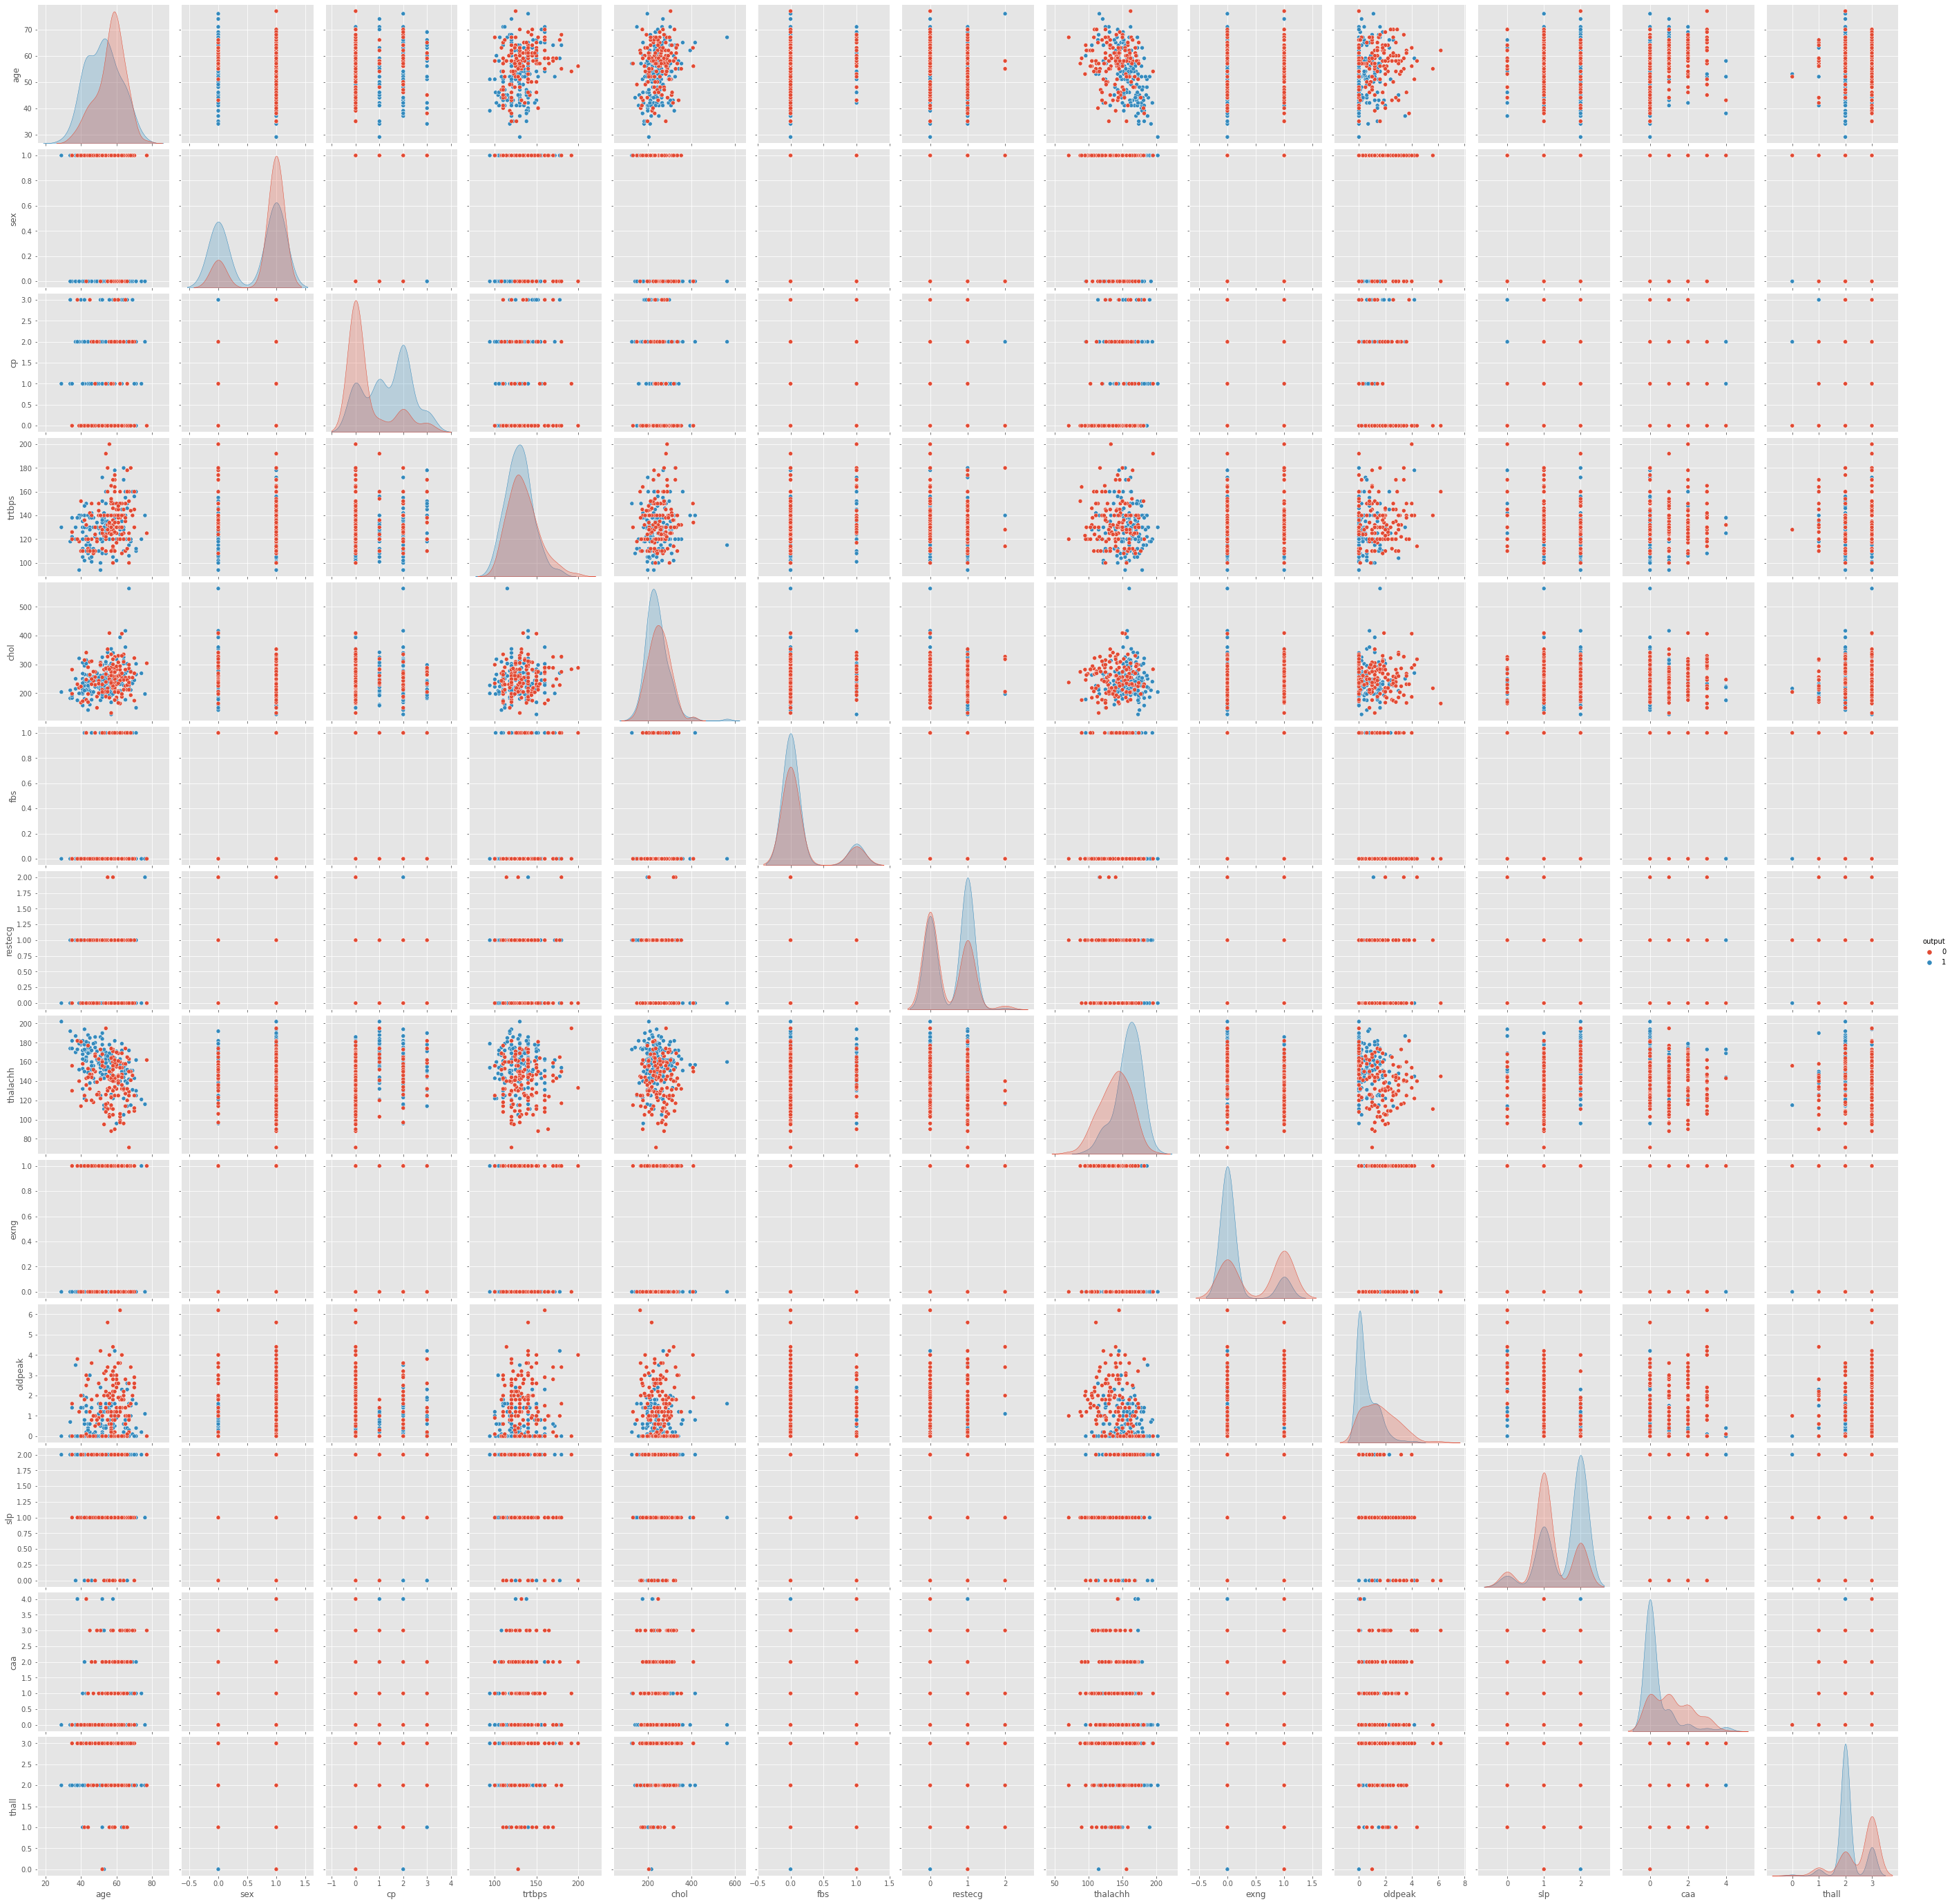

In [75]:
sns.pairplot(df, hue='output', height=3, aspect=1)

<function matplotlib.pyplot.show(close=None, block=None)>

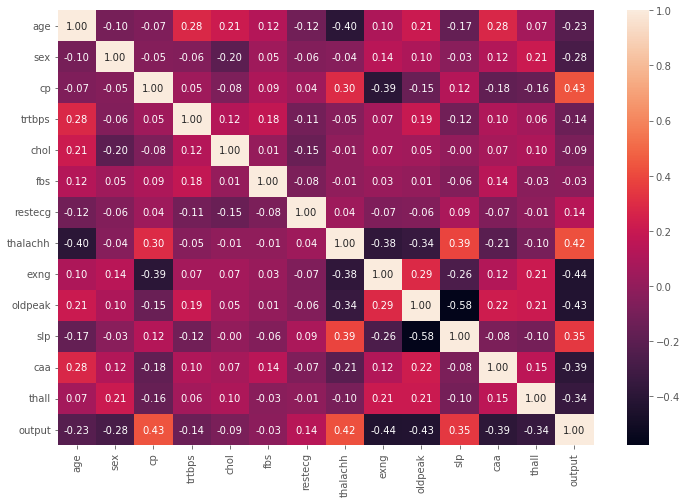

In [76]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f')
plt.show

In [77]:
x = df[['exng']]
y = df [['output']]

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
model1 = LinearRegression()

In [80]:
model1.fit(x,y)

LinearRegression()

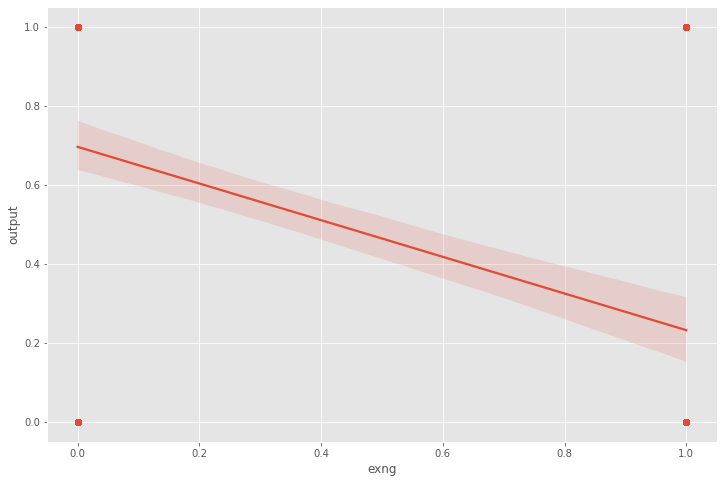

In [81]:
plt.figure(figsize=(12,8));
sns.regplot(x=x, y=y);
plt.xlabel('exng')
plt.ylabel("output")
plt.show();

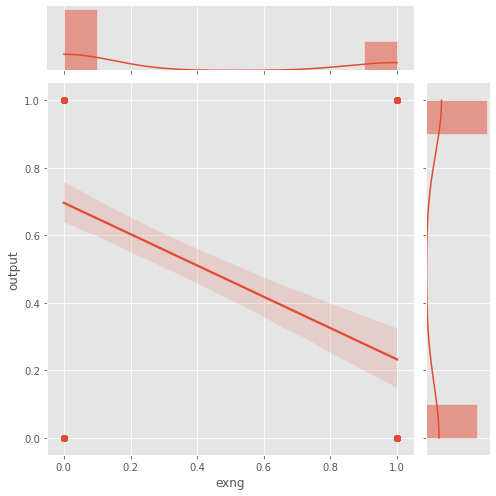

In [82]:
sns.jointplot(x='exng', y='output', data=df, kind='reg', height=7);
plt.show();

In [83]:
x = df[['sex','cp','exng','oldpeak','slp','caa','thall']]
y = df['output'].values
model = LogisticRegression() #solvers default:'ibfgs','newton-cg','liblinear','sag','saga'
model.fit(x,y)

LogisticRegression()

In [84]:
y_pred = model.predict(x)
y == y_pred

print(pd.DataFrame({"Feature":x.columns.tolist(),"Coefficients":model.coef_[0]}))
print(model.intercept_)
print((y == y_pred).sum())
print(model.score(x,y))



   Feature  Coefficients
0      sex     -1.162406
1       cp      0.843546
2     exng     -1.042056
3  oldpeak     -0.626237
4      slp      0.664183
5      caa     -0.778171
6    thall     -0.814958
[2.63908247]
255
0.8415841584158416


In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [86]:
model2= LogisticRegression(solver= 'liblinear')

In [87]:
model2.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [88]:
y_train_pred = model2.predict(X_train)

In [89]:
y_test_pred = model2.predict(X_test)

In [90]:
model.score(X_train,y_train)

0.8388429752066116

In [91]:
model2.score(X_train,y_train)

0.8388429752066116

In [92]:
model.score(X_test,y_test)

0.8524590163934426

In [93]:
model2.score(X_test,y_test)

0.8360655737704918